#$\quad$ Tobin Model

## 1. Incorporation of the *risk-free asset*

- We will denote the risk-free asset as **$R_f$**, which is characterised by:

- **Guaranteed return**: It offers a fixed return that is known in advance: $\quad Return \   R_{f,t} = r_f = cte \ \Rightarrow \ E(R_f) = r_f$

    - **Zero variance**: Since $r_f = cte$, the variance is zero: $\quad Var(r_f) =  \sigma^2_f = 0$

    - **Zero covariance**: The covariance of the risk-free asset with any other asset is zero: $\quad covar(r_f, r_i) = 0 \qquad \forall i$

- **Common examples**: Government bonds from stable countries, such as US Treasury bonds.

**What happens when you create a portfolio with one risk-free asset and one risky asset?**

- Risk-free asset:
  - $E(r_f) = r_f$
  - $Var(r_f) = 0$

- Risky asset:
  - $E(\tilde{r})=\mu$
  - $Var(\tilde{r})=\sigma^2$


If we create a mixed portfolio $p$ with weights $w$ and $1 - w$:

- The return will be:
  
  $$\boxed{r_p = w r_f + (1 - w) \mu} \tag{1}$$

  - The variance will be:
  
  $$\sigma^2_p = w^2 \underbrace{Var(r_f)}_{\text{= 0}} + (1-w)^2 Var(\tilde{r}) + 2w(1-w)\underbrace{covar(r_f, \tilde{r})}_{\text{= 0}}$$
  $$\sigma^2_p = (1-w)^2 \sigma^2 \ \ \Rightarrow \ \boxed{\sigma_p = (1-w)\sigma} \tag{2}$$

The risk of the portfolio depends only on the investment made in the risky asset.

Solving for $w$ and substituting in the expected return, we have that:

- The return on the mixed portfolio will be:

**If we have a target return ($r_p$)**, we solve for $w$ in equation $(1)$.

$$\quad \boxed{w = \frac{r_p - \mu}{r_f - \mu}}$$

**If we have a target volatility ($\sigma_p$)**, we solve for $w$ from equation $(2)$.

$$\quad \boxed{w = 1 - \frac{\sigma_p}{\sigma}}$$

- **Investment in Risk-Free Assets:**
  - If $w = 1$: Invest everything in risk-free assets.
- **Investment in Efficient Portfolio:**
  - If $w = 0$: Invest everything in the efficient portfolio.
- **Combined Investment:**
  - If $0 < w < 1$:
    - Invest part in risk-free assets and part in the efficient portfolio.
    - The return and volatility of the new portfolio are calculated using the above formulas.
- **Debt and Investment in Efficient Portfolio:**
  - If $w < 0$:
    - The investor borrows at the risk-free rate.
    - Invests everything in the efficient portfolio.

## 2. Examples with real assets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import cvxpy as cp
import yfinance as yf
import seaborn as sns
#import gurobipy as gp
#from gurobipy import GRB
from scipy.interpolate import interp1d

plt.style.use('ggplot')

#### We download the data

In [ ]:
# Date range
start = '2015-01-01'
end = '2019-12-30'

# Assets todos con retornos positivos
assets = ['BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'F', 'GE', 'HPQ',
        'JCI', 'JPM','KHC', 'LUV', 'MMC', 'MO', 'NI', 'PCAR', 'PSA', 'SEE',
        'T', 'TGT', 'TMO','TXT', 'VZ', 'ZION']

# Downloading data
prices = yf.download(assets, start = start, end = end,auto_adjust=True)['Close'].dropna()
prices.columns = assets


[*********************100%***********************]  26 of 26 completed


We select the asset with ticker 'BA' and define the risk-free asset return $r_f$.

In [ ]:
rf = 0.03 # Risk-free asset return (annual)
ret_rf = rf / 252 # Daily risk-free asset return

retornos = np.log(prices.loc[:, ['BA']]).diff().dropna()

retornos['Rf'] = ret_rf
retornos.head()

,BA,Rf
Date,,
2015-07-07,0.018543,0.000119
2015-07-08,-0.008630,0.000119
2015-07-09,0.006182,0.000119
2015-07-10,0.011696,0.000119
2015-07-13,0.014703,0.000119


We are going to generate portfolios with these two assets by generating random weights:

In [ ]:
# num_carteras = 1000
num_act = 2

#random weights
pesos_w1 = np.linspace(-1, 1, 200)
pesos_w2 = 1 - pesos_w1
pesos = np.concatenate((pesos_w2[:, None], pesos_w1[:, None]), axis=1)
pesos.shape

(200, 2)

In [ ]:
#return and volatility
ret_carteras = retornos @ pesos.T

volatilidades = np.sqrt(np.var(ret_carteras, axis=0)*252)
rentabilidades = 252*np.mean(ret_carteras, axis=0)

In [ ]:
# Annual return

retornos.mean()*252

,0
BA,0.216431
Rf,0.030000


In [ ]:
# Annual volatility

retornos.std()*np.sqrt(252)

,0
BA,2.581134e-01
Rf,2.281491e-17


In [ ]:
def pinta_lineal(rf, r, std, hline=None, vline=None, nueva_figura=True, tag=None):

    if nueva_figura:
        plt.figure(figsize=(10, 6))

    # Puntos de cada activo
    plt.scatter(volatilidades, rentabilidades, color='blue', s=50, marker='.', alpha=0.7)

    # Añadiendo los nombres de los activos con un desplazamiento
    desplazamiento_x = 0.001  # Ajusta este valor según sea necesario
    desplazamiento_y = 0.01  # Ajusta este valor según sea necesario


    plt.scatter(0, rf*252, color='red', s=250, alpha=0.7)
    plt.text(0-4*desplazamiento_x, rf*252+2*desplazamiento_y, '$R_f$', fontsize=20, color='red')

    # Añadiendo títulos y etiquetas
    plt.title('Gráfico Cartera con activo libre de riesgo', fontsize=16)
    plt.xlabel('Volatilidad (Desviación Estándar)', fontsize=12)
    plt.ylabel('Retorno Esperado', fontsize=12)

    # Añadiendo leyenda con mejor posición
    #plt.legend(loc='best')

    # Mostrando la cuadrícula para mejor lectura
    plt.grid(True, linestyle='--', alpha=0.5)

    # Añadir el punto BA con su etiqueta
    if tag is not None:
        # Coordenadas de los puntos Rf y BA
        x_rf = 0
        y_rf = rf * 252
        x_ba = std * np.sqrt(252)
        y_ba = r * 252

        # Dibujar una línea horizontal entre Rf y BA
        plt.hlines(y_rf - 0.02, x_rf, x_ba, colors='black', linestyles='dashed', linewidth=2)
        plt.vlines(0, y_rf-0.02, y_rf, color="red")
        plt.vlines(x_ba, y_rf-0.02, y_ba, color="green")

        # Añadir el texto entre Rf y BA
        plt.text((x_rf + x_ba) / 2, y_rf + 0.01, 'Inversión en Rf', fontsize=12, ha='center')

        # Dibujar una línea horizontal pasado BA
        plt.hlines(y_rf - 0.02, x_ba, x_ba*2, colors='black', linestyles='dashed', linewidth=2)
        plt.vlines(x_ba, y_rf-0.02, y_ba, color="green")
        plt.vlines(x_ba*2, y_rf-0.02, y_ba*2 -0.03, color="green")

        # Añadir el texto pasado BA
        plt.text((x_ba + x_ba * 2) / 2, y_rf + 0.01, 'Endeudarse en Rf', fontsize=12, ha='center')

        plt.scatter(x_ba, y_ba, color='green', s=250, marker='o', alpha=0.7)
        plt.text(x_ba - 10 * desplazamiento_x, y_ba - 4 * desplazamiento_y, tag, fontsize=20, color='green')

    if hline is not None:
        plt.axhline(hline, color="black")

    if vline is not None:
        plt.axvline(vline, color="black")

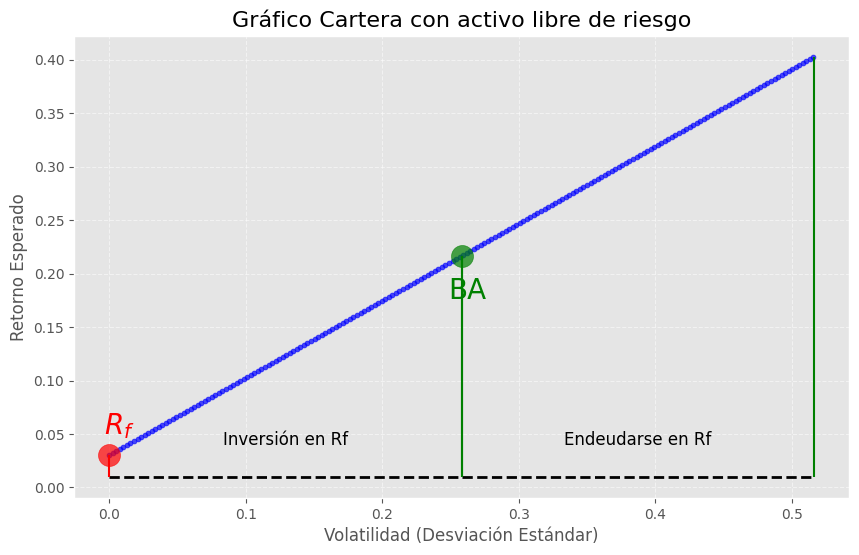

In [ ]:
pinta_lineal(ret_rf, retornos["BA"].mean(), retornos["BA"].std(), tag="BA")

### EXERCISE 1:

Calculate the portfolio formed by the two assets above and which has:

 a) an annual return of 14%

 b) an annual return of 25%

 c) an annual volatility of 7%

**A:**

In [ ]:
pinta_lineal(ret_rf, retornos["BA"].mean(), retornos["BA"].std(), hline=re, tag="BA")

NameError: name 're' is not defined

**B:**

In [ ]:
pinta_lineal(ret_rf, retornos["BA"].mean(), retornos["BA"].std(), hline=re, tag="BA")

**C:**

In [ ]:
pinta_lineal(ret_rf, retornos["BA"].mean(), retornos["BA"].std(), vline=stde, tag="BA")

## 3. Risk-free asset combinations with other assets

In [ ]:
retornos = np.log(prices).diff().dropna()

num_act = len(assets)

In [ ]:
#Calculamos la matriz de covarianzas y los retornos esperados
matriz_cov = retornos.cov().to_numpy() # Covariance matrix
retornos_esperados = retornos.mean().to_numpy() # Column vector expected return

First, we calculate the minimum risk portfolio.

In [ ]:
#Decision variables
pesos = cp.Variable(num_act)

#Restrictions
constraints = [pesos >= 0,  # No shorting
               cp.sum(pesos) == 1, # Fully invested
               ]

#Function Objective
riesgo = cp.quad_form(pesos, matriz_cov) # Riesgo de la cartera
objective = cp.Minimize(riesgo) # Minimizar la varianza

ret = retornos_esperados.T @ pesos # Retorno esperado de la cartera

#Problem and solution
prob = cp.Problem(objective, constraints)
resultado = prob.solve()

#We maintain the profitability and risk values of the minimum risk portfolio.
min_riesgo = np.array([np.sqrt(riesgo.value), ret.value])

Definimos los distintos valores de riesgo para calcular la frontera eficiente:

- Riesgo mínimo: El de la cartera de mínimo riesgo

- Riesgo máximo: El del activo de máxima rentabilidad

In [ ]:
imax = np.argmax(retornos.mean(axis=0)) # Identify asset of maximum average return
riesgos_lst = np.linspace(min_riesgo[0], np.sqrt(matriz_cov[imax, imax]), num=500) # Generates volatilities between the maximum and minimum

Calculamos la cartera de mayor rentabilidad para cada uno de los riesgos anteriores.

In [ ]:
retornos_lst = []
pesos_lst = []

for risk in riesgos_lst:
 #Variables de decisión
    pesos = cp.Variable(num_act)

    # Función objetivo
    rentabilidad = cp.Maximize(retornos_esperados.T @ pesos)

    #Restricciones
    riesgo = cp.quad_form(pesos, matriz_cov)

    constraints = [pesos >= 0,
                    cp.sum(pesos) == 1,
                    riesgo <= risk**2
                    ]

    prob = cp.Problem(rentabilidad, constraints)
    resultado = prob.solve()

    retornos_lst.append(rentabilidad.value)
    pesos_lst.append(pesos.value)

In [ ]:
def pinta_frontera():
    plt.figure(figsize=(12, 6))

    #Desplazamientos para las etiquetas
    desplazamiento_x = 0.001  # Ajusta este valor según sea necesario
    desplazamiento_y = 0.005  # Ajusta este valor según sea necesario



    plt.scatter(np.sqrt(252)*min_riesgo[0], 252*min_riesgo[1], c='red', marker='x', s=50, alpha=0.7)
    plt.text(np.sqrt(252)*min_riesgo[0]+ 3*desplazamiento_x, 252*min_riesgo[1] +  2*desplazamiento_y , 'Min riesgo', fontsize=13, color='red')

    # Puntos de cada activo
    plt.scatter(np.sqrt(np.diag(matriz_cov)*252),252* retornos_esperados, color='blue', s=50, alpha=0.7)
    plt.plot(np.sqrt(252)*riesgos_lst, 252*np.array(retornos_lst), '-', color='green', label='Frontera Eficiente', alpha=0.5)


    # Añadiendo los nombres de los activos con un desplazamiento


    for i, asset in enumerate(assets):
        plt.text(np.sqrt(matriz_cov[i, i]*252) + desplazamiento_x, 252*retornos_esperados[i]+desplazamiento_y , asset, fontsize=9)
    plt.xlabel('Volatilidad')
    plt.ylabel('Rentabilidad')
    plt.title('Activos y frontera eficiente')
    #plt.colorbar(label='Sharpe ratio')



    # Configurar el borde de la figura
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

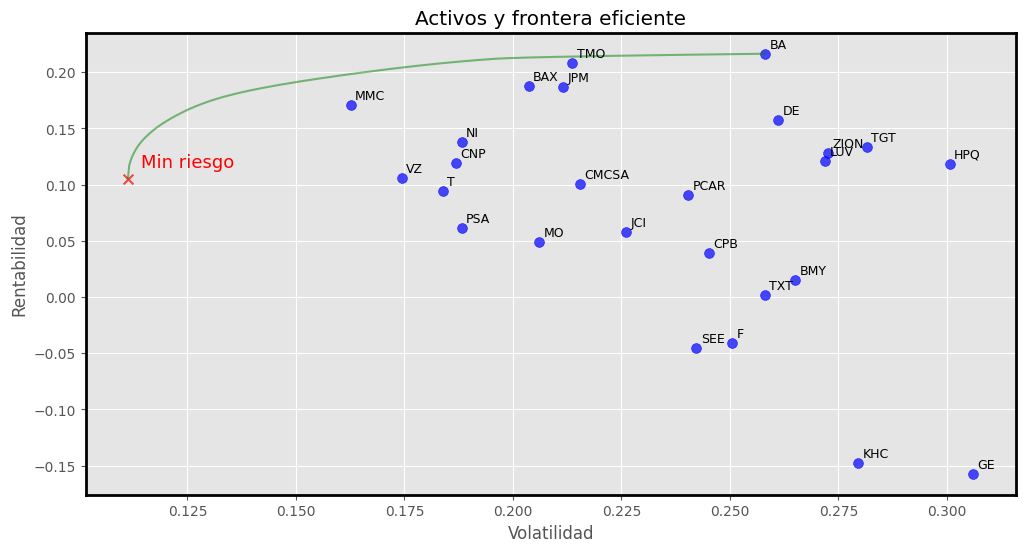

In [ ]:
pinta_frontera()

Let us now analyse the effect of introducing:

- Risk-free assets

- The possibility of financing or borrowing with risk-free assets


As we saw in the previous chapter (Markowitz), the only portfolios that make sense to use are those on the efficient frontier. To begin with, we will choose the minimum risk portfolio and generate **mixed portfolios consisting of the risk-free asset and the minimum risk portfolio**. We have seen that the portfolios formed will form a straight line passing through the two assets.

In [ ]:
def pinta_carteras_con_rf(rf, r, std, tag=None):
    pinta_frontera()
    pinta_lineal(rf, r, std, nueva_figura=False, tag=tag)

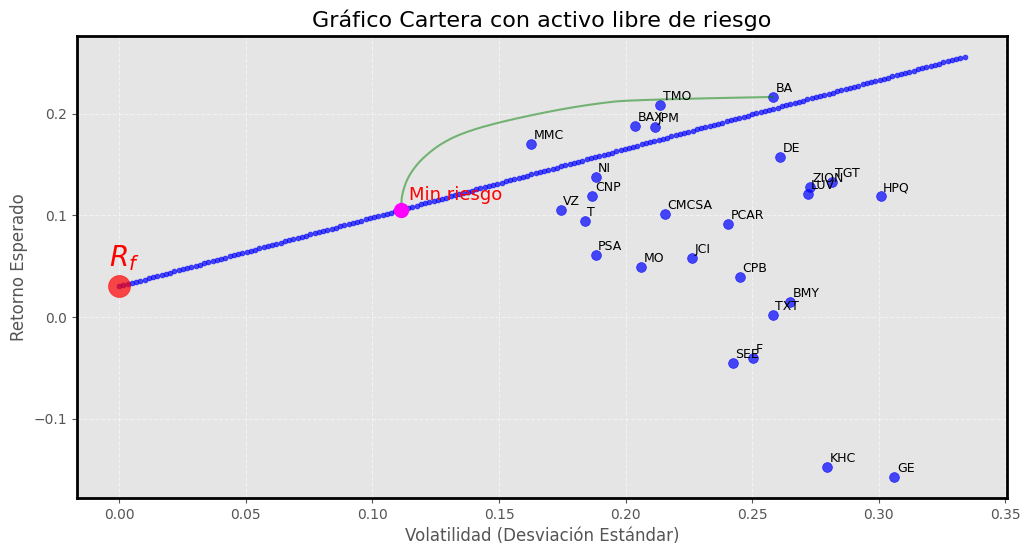

In [ ]:
pesos_w1 = np.linspace(-2, 1, 200)
volatilidades = []
rentabilidades = []
for w1 in pesos_w1:
    w2 = 1 - w1
    volatilidades.append((w2 * min_riesgo[0]) * np.sqrt(252))
    rentabilidades.append((ret_rf * w1 + min_riesgo[1] * w2)*252)

pinta_carteras_con_rf(ret_rf, min_riesgo[1], min_riesgo[0])
plt.plot(min_riesgo[0]*np.sqrt(252), min_riesgo[1]*252, '.', markersize=20, color="magenta")

I can choose another portfolio from the efficient frontier and generate mixed portfolios with the risk-free asset.

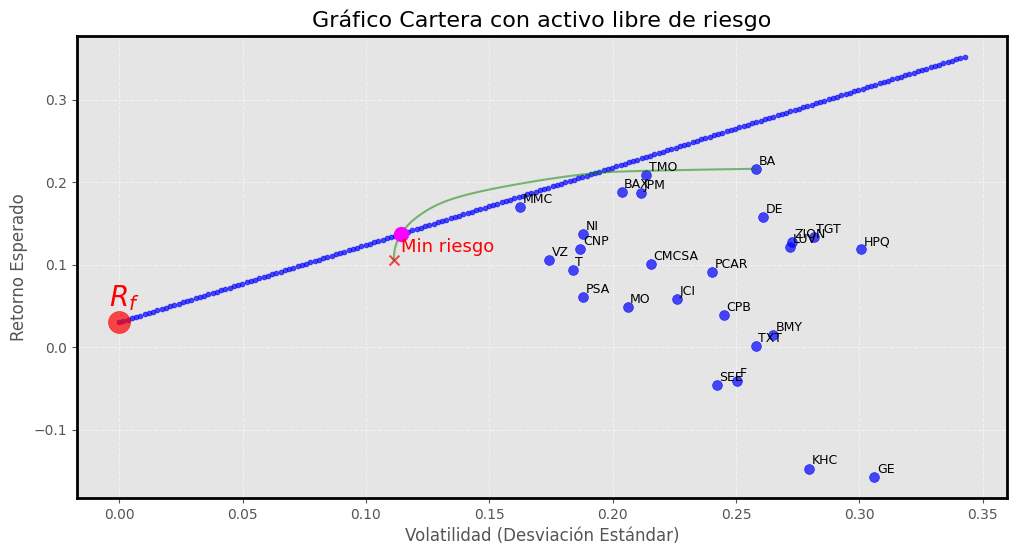

In [ ]:
punto_act1 = [riesgos_lst[10], retornos_lst[10]]

pesos_w1 = np.linspace(-2, 1, 200)
volatilidades = []
rentabilidades = []
for w1 in pesos_w1:
    w2 = 1 - w1
    rentabilidades.append((ret_rf * w1 + punto_act1[1] * w2)*252)
    volatilidades.append((w2 * punto_act1[0]) * np.sqrt(252))

pinta_carteras_con_rf(ret_rf, punto_act1[1], punto_act1[0])
plt.plot(punto_act1[0]*np.sqrt(252), punto_act1[1]*252, '.', markersize=20, color="magenta")

Let us draw the lines for several portfolios on the efficient frontier:

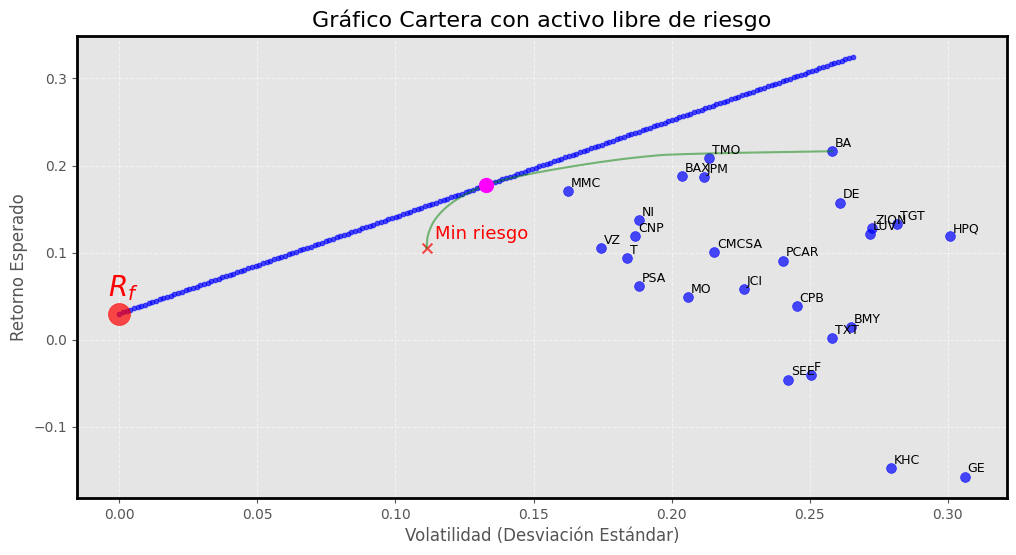

In [ ]:
punto_act1 = [riesgos_lst[73], retornos_lst[73]]

pesos_w1 = np.linspace(-1, 1, 200)
volatilidades = []
rentabilidades = []
for w1 in pesos_w1:
    w2 = 1 - w1
    rentabilidades.append((ret_rf * w1 + punto_act1[1] * w2)*252)
    volatilidades.append((w2 * punto_act1[0]) * np.sqrt(252))

pinta_carteras_con_rf(ret_rf, punto_act1[1], punto_act1[0])
plt.plot(punto_act1[0]*np.sqrt(252), punto_act1[1]*252, '.', markersize=20, color="magenta")

## 4. Capital market line

Let us formally determine the **capital market line (CML)**:

To do this, we analyse the structure of the efficient frontier when we introduce the risk-free asset:

$$\begin{gather}
max \text{   } w_0r_f+\mu^T w-\lambda w^T\Sigma w \tag{1}\\
s.t. \text{   } w_0+w=1 \nonumber
\end{gather}$$

where:

- $w_0$ is the investment in the risk-free asset,

- $w$ is the investment in the risky asset,

- $r_f$ is the return on the risk-free asset,

- $\mu$ is the expected return on the risky asset,

- $\lambda$ is the investor's risk aversion coefficient, and

- $\Sigma$ is the covariance matrix.


The above equation can be rewritten as an unconstrained problem by eliminating $w_0$, as follows:

- we remove $w_0$ from the constraint
- we substitute it in the objective function
- we simplify and rewrite

$$\max \text{   } w^T\pi - \lambda w^T\Sigma \tag{2}w$$

where $\pi=\mu-R_f$ is the risk premium vector.

We apply the first-order condition (we derive and set equal to 0):

$$\pi-2\lambda\Sigma w=0 \tag{3}$$

Solving, we obtain the weights of an efficient mixed portfolio:

$$w^*=\frac{1}{\lambda}\Sigma^{-1}\pi$$
$$w_0^*=1-w^{*T} \quad \Rightarrow w_0^*=1-\frac{1}{\lambda}i^T\Sigma^{-1}\pi$$

We observe that when $\lambda \rightarrow +\infty$, the entire investment is allocated to the risk-free asset.

The coefficient $\lambda$ determines the weight of the risk-free asset in the portfolio.

### Calculation of the tangent portfolio

In the figure above, we see that efficient portfolios are **mixed portfolios** that lie on the tangent line passing through $r_f$.

The tangent line is, of all possible lines, the one with the maximum slope.

In the figure below, we can see that the slope is the $\text{Sharpe Ratio} = \Large \frac{r_p - r_f}{\sigma_p}$

Then we have to calculate the **portfolio with the maximum Sharpe ratio**.

### Calculation of the maximum Sharpe ratio with CVXPY

In [ ]:
#To-Do

### EXERCISE

Your financial advisor has suggested that the universe of assets in which to invest are those on the assets list we have been using in this notebook, plus the risk-free asset that gives an annual return equal to ret_rf. You have decided that, in order to pay all your expenses, you need to earn a return of 10% per annum. Calculate the portfolio you would form.

In [ ]:
#To-Do